In [14]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [3]:
df = pd.read_csv('Weather.csv')

C:\Users\VRAJ PATEL\Anaconda3.1\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_bin = df[['MaxTemp', 'MinTemp']]
df_bin.columns = ['MaxTemp', 'MinTemp']
df_bin.head()

,MaxTemp,MinTemp
0,25.555556,22.222222
1,28.888889,21.666667
2,26.111111,22.222222
3,26.666667,22.222222
4,26.666667,21.666667


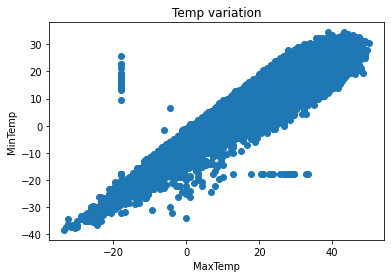

In [9]:
plt.scatter(x = "MaxTemp" , y = "MinTemp", data = df_bin)
plt.title('Temp variation')
plt.xlabel('MaxTemp')
plt.ylabel('MinTemp')
plt.show()

In [10]:
df_bin.fillna(method = 'ffill', inplace = True)

C:\Users\VRAJ PATEL\Anaconda3.1\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [12]:
X = np.array(df_bin['MaxTemp']).reshape(-1,1)
y = np.array(df_bin['MinTemp']).reshape(-1,1)

df_bin.dropna(inplace = True)


C:\Users\VRAJ PATEL\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [16]:
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 

0.7630940278662443


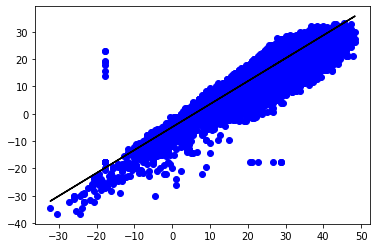

In [17]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 